# Fixing Employee Happiness at TechTrend Innovations - Assignment 04

You should complete this Jupyter Notebook with your answers. You may need to write code or add explanatory notes.

In [45]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from IPython.display import display

# Load the datasets
df_bicycle_counter = pd.read_csv("./data/Fremont_Bridge_Bicycle_Counter.csv")
df_weather = pd.read_csv("./data/weather.csv")

# Display the head of both DataFrames
print("Bicycle Counter Dataset Head:")
display(df_bicycle_counter.head())
print("\nWeather Dataset Head:")
display(df_weather.head())

Bicycle Counter Dataset Head:


,Date,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0



Weather Dataset Head:


,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT08
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-01,10.51,NaN,0.00,0.0,0.0,NaN,55.0,41.0,100.0,90.0,19.9,25.1,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-02,10.07,NaN,0.43,0.0,0.0,NaN,51.0,37.0,180.0,200.0,29.1,40.0,1.0,NaN,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-03,5.14,NaN,0.03,0.0,0.0,NaN,53.0,45.0,180.0,170.0,12.1,15.0,NaN,NaN,NaN,NaN,NaN
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-04,10.51,NaN,0.80,0.0,0.0,NaN,54.0,42.0,180.0,190.0,23.9,33.1,1.0,NaN,NaN,NaN,NaN
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-05,13.65,NaN,0.05,0.0,0.0,NaN,48.0,37.0,200.0,220.0,23.9,36.9,1.0,NaN,NaN,NaN,NaN


In [3]:
columns = df_bicycle_counter.columns
for col in columns:
    print(f'{col}          {df_bicycle_counter[col].dtype}              {df_bicycle_counter[col].unique()[:10]}')

Date          object              ['10/02/2012 01:00:00 PM' '10/02/2012 02:00:00 PM'
 '10/02/2012 03:00:00 PM' '10/02/2012 04:00:00 PM'
 '10/02/2012 05:00:00 PM' '10/02/2012 06:00:00 PM'
 '10/02/2012 07:00:00 PM' '10/02/2012 08:00:00 PM'
 '10/02/2012 09:00:00 PM' '10/02/2012 10:00:00 PM']
Fremont Bridge Sidewalks, south of N 34th St Total          float64              [ 55. 130. 152. 278. 563. 381. 175.  86.  63.  42.]
Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk          float64              [  7.  55.  81. 167. 393. 236. 104.  51.  35.  27.]
Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk          float64              [ 48.  75.  71. 111. 170. 145.  35.  28.  15.   4.]


In [4]:
print(df_bicycle_counter.describe())
print(df_bicycle_counter.isna().sum())

       Fremont Bridge Sidewalks, south of N 34th St Total  \
count                                      110203.000000    
mean                                          105.671406    
std                                           131.116919    
min                                             0.000000    
25%                                            13.000000    
50%                                            59.000000    
75%                                           145.000000    
max                                          1097.000000    

       Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  \
count                                      110203.000000                    
mean                                           45.026605                    
std                                            58.749206                    
min                                             0.000000                    
25%                                             5.000000         

In [5]:
columns = df_weather.columns
for col in columns:
    print(f'{col}          {df_weather[col].dtype}              {df_weather[col].unique()[:10]}')

STATION          object              ['USW00024233']
NAME          object              ['SEATTLE TACOMA AIRPORT, WA US']
DATE          object              ['2012-01-01' '2012-01-02' '2012-01-03' '2012-01-04' '2012-01-05'
 '2012-01-06' '2012-01-07' '2012-01-08' '2012-01-09' '2012-01-10']
AWND          float64              [10.51 10.07  5.14 13.65  4.92  4.47  7.61 11.41  4.25  2.91]
PGTM          float64              [  nan 2234. 2303. 1952. 1931. 2229. 1412. 1728.  749. 2242.]
PRCP          float64              [0.   0.43 0.03 0.8  0.05 0.1  0.17 0.04 0.16 0.21]
SNOW          float64              [0.  2.4 0.1 6.8 0.3 0.9 0.6 1.1 2.9 0.8]
SNWD          float64              [0.  2.  1.  3.  3.1 1.2 3.9 5.9 7.1 5.1]
TAVG          float64              [nan 55. 53. 54. 50. 45. 46. 48. 49. 43.]
TMAX          float64              [55. 51. 53. 54. 48. 40. 45. 50. 49. 43.]
TMIN          float64              [41. 37. 45. 42. 36. 33. 30. 29. 27. 26.]
WDF2          float64              [100. 180. 

In [6]:
print(df_weather.describe())
print(df_weather.isna().sum())

              AWND         PGTM         PRCP         SNOW         SNWD  \
count  4861.000000   149.000000  4883.000000  4885.000000  4884.000000   
mean      7.676649  1390.798658     0.111233     0.017523     0.026597   
std       3.034616   639.657816     0.248990     0.259480     0.320248   
min       0.890000     1.000000     0.000000     0.000000     0.000000   
25%       5.590000  1022.000000     0.000000     0.000000     0.000000   
50%       7.160000  1426.000000     0.000000     0.000000     0.000000   
75%       9.400000  1902.000000     0.110000     0.000000     0.000000   
max      21.250000  2358.000000     3.250000     8.900000     7.100000   

              TAVG         TMAX         TMIN         WDF2         WDF5  \
count  4438.000000  4887.000000  4886.000000  4861.000000  4823.000000   
mean     53.604552    61.270104    46.353664   176.833368   183.596309   
std      10.773876    13.383642     9.162212   101.715800    99.490874   
min      17.000000    22.000000    15

## Background: CycleWorks’ Big Ad Push

Welcome to **CycleWorks**, a Seattle bike shop facing fierce competition from flashy online retailers. Marketing director **Ms. Sarah Speed**, a former cycling champ, has a plan to dominate the upcoming Seattle Bike Expo with a killer ad campaign on the bustling **Fremont Bridge**, where cyclists swarm daily. But Seattle’s wild weather and unpredictable rider patterns make timing and placement tricky. Armed with datasets on daily cyclist counts, you, the star data analyst, must uncover when and where to place ads to make CycleWorks the talk of the town!

## Task 1: Preparing CycleWorks’ Data to Fuel Sarah Speed’s Ad Campaign
Ms. Sarah Speed’s big advertising push for **CycleWorks** relies on you to clean up the Fremont Bridge cyclist data and align it with Seattle’s weather. Your clean dataset will reveal when cyclists hit the bridge most.  
- Aggregate the hourly Fremont Bridge bicycle data to daily, creating `TotalCyclists` as the sum of east and west counts.
- Extract features from the date: `DayOfWeek` (0-6), `Month` (1-12), and `Season` (Winter, Spring, Summer, Fall).  
- Filter Seattle weather data to match the bicycle data’s time range and handle missing values in TAVG, PRCP, AWND (e.g., fill with means).  
- Merge the daily bicycle and weather data by date for a unified dataset.

In [8]:
def data_overview(df):
    """
    Provides a comprehensive overview of the cleaned dataset
    """
    print("\n" + "="*60)
    print("CYCLEWORKS DATA OVERVIEW")
    print("="*60)
    
    print(f"\nDataset Shape: {df.shape[0]} days × {df.shape[1]} features")
    
    print(f"\nDate Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    
    print(f"\nCyclist Traffic Distribution:")
    print(f"- Mean: {df['TotalCyclists'].mean():.1f} cyclists/day")
    print(f"- Median: {df['TotalCyclists'].median():.1f} cyclists/day") 
    print(f"- Std Dev: {df['TotalCyclists'].std():.1f}")
    print(f"- Range: {df['TotalCyclists'].min()} - {df['TotalCyclists'].max()} cyclists/day")
    
    print(f"\nSeasonal Distribution:")
    seasonal_counts = df['Season'].value_counts()
    for season in ['Spring', 'Summer', 'Fall', 'Winter']:
        if season in seasonal_counts:
            print(f"- {season}: {seasonal_counts[season]} days")
    
    print(f"\nWeekly Pattern:")
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for i, day in enumerate(day_names):
        count = (df['DayOfWeek'] == i).sum()
        avg_cyclists = df[df['DayOfWeek'] == i]['TotalCyclists'].mean()
        print(f"- {day}: {count} days, avg {avg_cyclists:.1f} cyclists")

In [11]:
def correlation_analysis(df):
    """
    Analyze correlations between cyclist traffic and weather variables
    """
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS FOR CYCLEWORKS")
    print("="*60)
    
    correlation_vars = ['TotalCyclists', 'East_Sidewalk', 'West_Sidewalk', 
                       'TAVG', 'PRCP', 'AWND', 'DayOfWeek', 'Month']
    
    corr_df = df[correlation_vars].copy()
    correlation_matrix = corr_df.corr()
    
    print("\nCorrelation with Total Cyclists:")
    print("-" * 35)
    cyclist_correlations = correlation_matrix['TotalCyclists'].sort_values(key=abs, ascending=False)
    
    for var, corr in cyclist_correlations.items():
        if var != 'TotalCyclists':
            strength = ""
            if abs(corr) > 0.7:
                strength = "Strong"
            elif abs(corr) > 0.3:
                strength = "Moderate"
            elif abs(corr) > 0.1:
                strength = "Weak"
            else:
                strength = "Very Weak"
            
            direction = "Positive" if corr > 0 else "Negative"
            print(f"{var:15}: {corr:6.3f} ({strength} {direction})")
    
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
    plt.title('Correlation Matrix: CycleWorks Data', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

In [12]:
def create_basic_visualizations(df):
    """
    Create essential visualizations for CycleWorks data analysis
    """
    print("\n" + "="*60)
    print("CYCLEWORKS BASIC VISUALIZATIONS")
    print("="*60)
    
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Daily cyclist traffic over time
    plt.subplot(3, 3, 1)
    plt.plot(df['Date'], df['TotalCyclists'], alpha=0.7, linewidth=0.8, color='steelblue')
    plt.title('Daily Cyclist Traffic Over Time', fontsize=12, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Total Cyclists')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 2. East vs West sidewalk comparison
    plt.subplot(3, 3, 2)
    plt.scatter(df['East_Sidewalk'], df['West_Sidewalk'], alpha=0.6, color='orange', s=30)
    plt.plot([0, max(df['East_Sidewalk'].max(), df['West_Sidewalk'].max())], 
             [0, max(df['East_Sidewalk'].max(), df['West_Sidewalk'].max())], 
             'r--', alpha=0.8, label='Equal Traffic Line')
    plt.title('East vs West Sidewalk Traffic', fontsize=12, fontweight='bold')
    plt.xlabel('East Sidewalk Cyclists')
    plt.ylabel('West Sidewalk Cyclists')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Weekly pattern
    plt.subplot(3, 3, 3)
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    weekly_avg = df.groupby('DayOfWeek')['TotalCyclists'].mean()
    colors = ['lightcoral' if i in [5, 6] else 'steelblue' for i in range(7)]
    plt.bar(day_names, weekly_avg.values, color=colors, alpha=0.8)
    plt.title('Average Cyclists by Day of Week', fontsize=12, fontweight='bold')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Cyclists')
    plt.grid(True, alpha=0.3, axis='y')
    
    # 4. Seasonal pattern
    plt.subplot(3, 3, 4)
    seasonal_avg = df.groupby('Season')['TotalCyclists'].mean()
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_colors = ['lightblue', 'lightgreen', 'gold', 'orange']
    plt.bar(season_order, [seasonal_avg.get(s, 0) for s in season_order], 
            color=season_colors, alpha=0.8)
    plt.title('Average Cyclists by Season', fontsize=12, fontweight='bold')
    plt.xlabel('Season')
    plt.ylabel('Average Cyclists')
    plt.grid(True, alpha=0.3, axis='y')
    
    # 5. Temperature vs Cyclists
    plt.subplot(3, 3, 5)
    plt.scatter(df['TAVG'], df['TotalCyclists'], alpha=0.6, color='red', s=30)
    plt.title('Temperature vs Cyclist Traffic', fontsize=12, fontweight='bold')
    plt.xlabel('Average Temperature (°F)')
    plt.ylabel('Total Cyclists')
    plt.grid(True, alpha=0.3)
    
    # 6. Precipitation vs Cyclists
    plt.subplot(3, 3, 6)
    plt.scatter(df['PRCP'], df['TotalCyclists'], alpha=0.6, color='blue', s=30)
    plt.title('Precipitation vs Cyclist Traffic', fontsize=12, fontweight='bold')
    plt.xlabel('Precipitation (inches)')
    plt.ylabel('Total Cyclists')
    plt.grid(True, alpha=0.3)
    
    # 7. Monthly trend
    plt.subplot(3, 3, 7)
    monthly_avg = df.groupby('Month')['TotalCyclists'].mean()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(range(1, 13), [monthly_avg.get(i, 0) for i in range(1, 13)], 
             marker='o', linewidth=2, markersize=6, color='purple')
    plt.title('Monthly Cycling Trends', fontsize=12, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Average Cyclists')
    plt.xticks(range(1, 13), month_names, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 8. Cyclist distribution histogram
    plt.subplot(3, 3, 8)
    plt.hist(df['TotalCyclists'], bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.title('Distribution of Daily Cyclist Counts', fontsize=12, fontweight='bold')
    plt.xlabel('Total Cyclists')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3, axis='y')
    
    # 9. Weather conditions impact
    plt.subplot(3, 3, 9)
    # Create weather categories
    df_viz = df.copy()
    df_viz['WeatherCategory'] = 'Clear'
    df_viz.loc[df_viz['PRCP'] > 0.1, 'WeatherCategory'] = 'Rainy'
    df_viz.loc[df_viz['TAVG'] < 40, 'WeatherCategory'] = 'Cold'
    df_viz.loc[df_viz['AWND'] > 15, 'WeatherCategory'] = 'Windy'
    
    weather_avg = df_viz.groupby('WeatherCategory')['TotalCyclists'].mean()
    plt.bar(weather_avg.index, weather_avg.values, 
            color=['skyblue', 'lightblue', 'lightcoral', 'lightgray'], alpha=0.8)
    plt.title('Cyclist Traffic by Weather Condition', fontsize=12, fontweight='bold')
    plt.xlabel('Weather Category')
    plt.ylabel('Average Cyclists')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    return df_viz

CYCLEWORKS DATA PREPARATION PIPELINE

STEP 1: Processing Bicycle Counter Data
----------------------------------------
Original bicycle data shape: (110232, 4)
Date range: 01/01/2013 01:00:00 AM to 12/31/2024 12:00:00 PM

Missing values before cleaning:
Total            29
West_Sidewalk    29
East_Sidewalk    29
dtype: int64

Verification - Total vs East+West correlation: 1.0000
Daily bicycle data shape: (4594, 5)
Date range after aggregation: 2012-10-02 00:00:00 to 2025-04-30 00:00:00

STEP 2: Extracting Date Features
----------------------------------------
Date features extracted:
- DayOfWeek: [1 2 3 4 5 6 0]
- Months: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
- Seasons: ['Fall' 'Winter' 'Spring' 'Summer']

STEP 3: Processing Weather Data
----------------------------------------
Weather data filtered from 2012-10-02 to 2025-04-30
Filtered weather data shape: (4594, 2

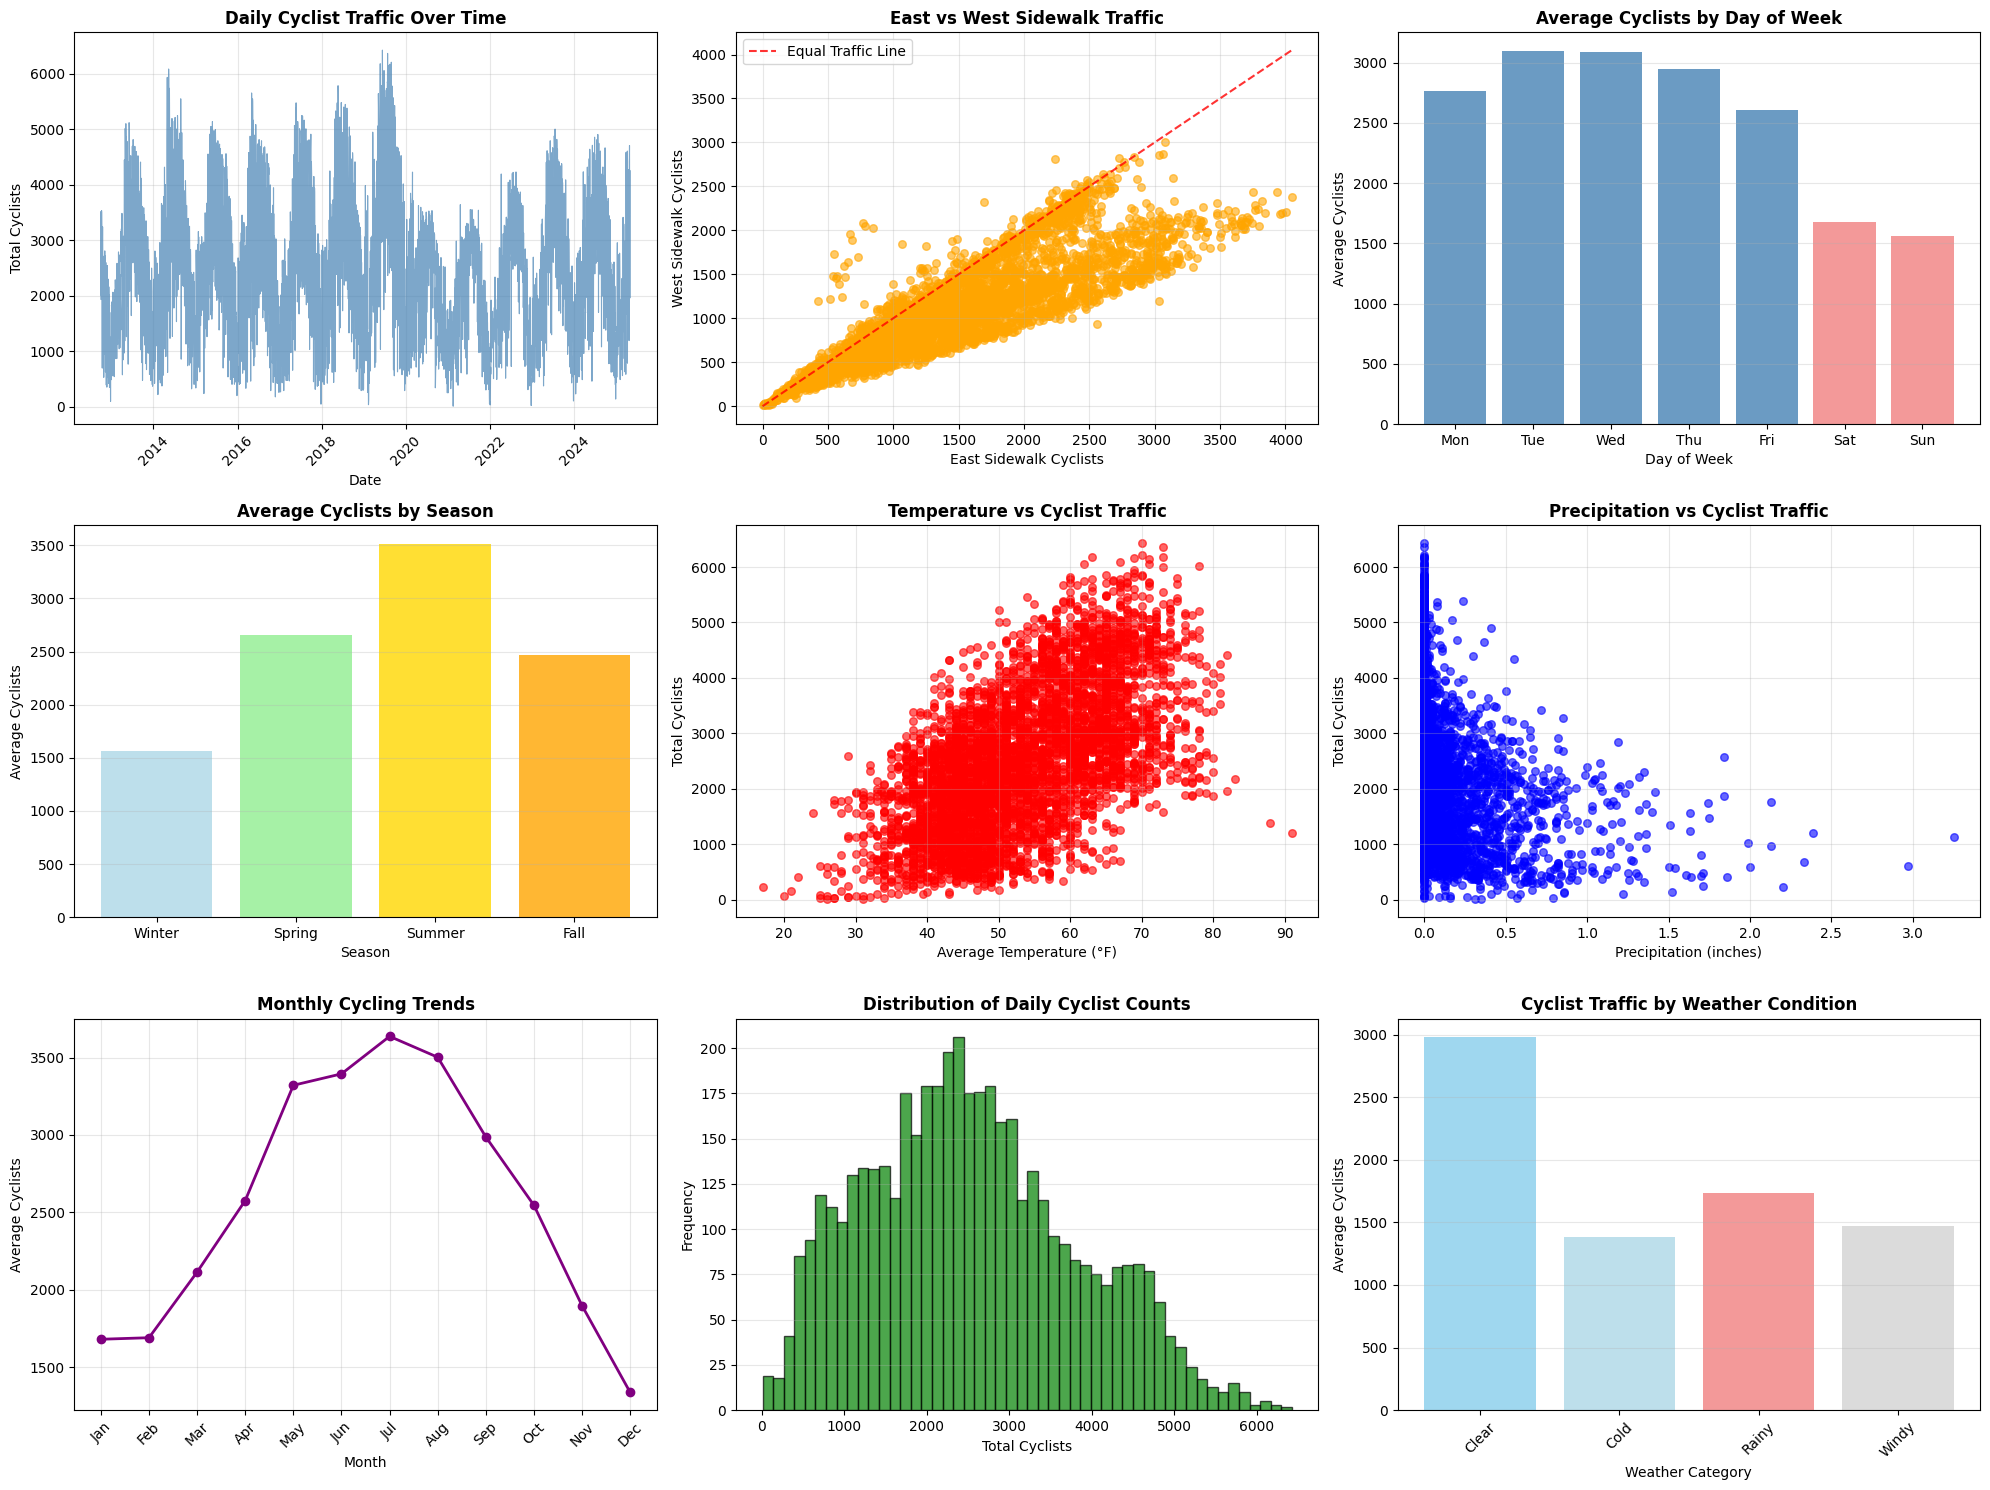


CORRELATION ANALYSIS FOR CYCLEWORKS

Correlation with Total Cyclists:
-----------------------------------
East_Sidewalk  :  0.975 (Strong Positive)
West_Sidewalk  :  0.951 (Strong Positive)
TAVG           :  0.595 (Moderate Positive)
DayOfWeek      : -0.390 (Moderate Negative)
PRCP           : -0.360 (Moderate Negative)
AWND           : -0.231 (Weak Negative)
Month          :  0.031 (Very Weak Positive)


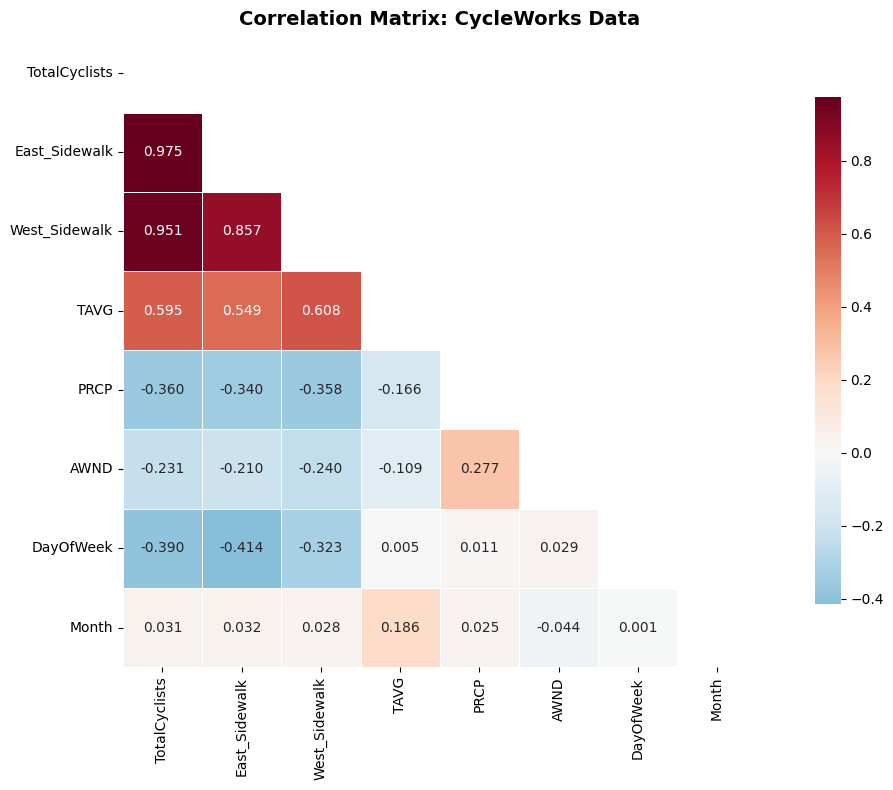

In [13]:
def prepare_cycleworks_data(df_bicycle_counter, df_weather):
    """
    Complete data preparation pipeline for CycleWorks ad campaign analysis
    """
    
    print("=" * 60)
    print("CYCLEWORKS DATA PREPARATION PIPELINE")
    print("=" * 60)

    
    # 1: Process Bicycle Counter Data
    print("\nSTEP 1: Processing Bicycle Counter Data")
    print("-" * 40)
    
    bicycle_df = df_bicycle_counter.copy()
    bicycle_df.columns = ['Date', 'Total', 'West_Sidewalk', 'East_Sidewalk']
    
    print(f"Original bicycle data shape: {bicycle_df.shape}")
    print(f"Date range: {bicycle_df['Date'].min()} to {bicycle_df['Date'].max()}")
    
    bicycle_df['Date'] = pd.to_datetime(bicycle_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
    
    bicycle_df['Date_Only'] = bicycle_df['Date'].dt.date
    
    print(f"\nMissing values before cleaning:")
    print(bicycle_df[['Total', 'West_Sidewalk', 'East_Sidewalk']].isnull().sum())
    
    # Fill missing values with 0 for now (assuming missing = no cyclists recorded)**********************
    bicycle_df[['Total', 'West_Sidewalk', 'East_Sidewalk']] = bicycle_df[['Total', 'West_Sidewalk', 'East_Sidewalk']].fillna(0)
    
    daily_bicycle = bicycle_df.groupby('Date_Only').agg({
        'Total': 'sum',
        'West_Sidewalk': 'sum', 
        'East_Sidewalk': 'sum'
    }).reset_index()
    
    daily_bicycle['TotalCyclists'] = daily_bicycle['East_Sidewalk'] + daily_bicycle['West_Sidewalk']
    
    print(f"\nVerification - Total vs East+West correlation: {daily_bicycle['Total'].corr(daily_bicycle['TotalCyclists']):.4f}")

    daily_bicycle = daily_bicycle.rename(columns={'Date_Only': 'Date'})
    daily_bicycle['Date'] = pd.to_datetime(daily_bicycle['Date'])
    
    print(f"Daily bicycle data shape: {daily_bicycle.shape}")
    print(f"Date range after aggregation: {daily_bicycle['Date'].min()} to {daily_bicycle['Date'].max()}")


    
    # 2: Extract Date Features
    print("\nSTEP 2: Extracting Date Features")
    print("-" * 40)
    
    # Day of week (0=Monday, 6=Sunday)
    daily_bicycle['DayOfWeek'] = daily_bicycle['Date'].dt.dayofweek
    
    # Month (1-12)
    daily_bicycle['Month'] = daily_bicycle['Date'].dt.month
    
    # Season mapping
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:  # 9, 10, 11
            return 'Fall'
    
    daily_bicycle['Season'] = daily_bicycle['Month'].apply(get_season)
    
    daily_bicycle['DayName'] = daily_bicycle['Date'].dt.day_name()
    
    print("Date features extracted:")
    print(f"- DayOfWeek: {daily_bicycle['DayOfWeek'].unique()}")
    print(f"- Months: {sorted(daily_bicycle['Month'].unique())}")
    print(f"- Seasons: {daily_bicycle['Season'].unique()}")


    
    # STEP 3: Process Weather Data
    print("\nSTEP 3: Processing Weather Data")
    print("-" * 40)
    
    weather_df = df_weather.copy()
    
    weather_df['Date'] = pd.to_datetime(weather_df['DATE'])
    
    bike_start_date = daily_bicycle['Date'].min()
    bike_end_date = daily_bicycle['Date'].max()
    
    weather_df = weather_df[
        (weather_df['Date'] >= bike_start_date) & 
        (weather_df['Date'] <= bike_end_date)
    ].copy()
    
    print(f"Weather data filtered from {bike_start_date.date()} to {bike_end_date.date()}")
    print(f"Filtered weather data shape: {weather_df.shape}")
    
    print(f"\nMissing values in key weather variables:")
    key_weather_vars = ['TAVG', 'PRCP', 'AWND', 'TMAX', 'TMIN']
    
    for var in key_weather_vars:
        if var in weather_df.columns:
            missing_count = weather_df[var].isnull().sum()
            print(f"- {var}: {missing_count} missing values")
    
    
    # For TAVG (average temperature), i decided to use the mean of TMAX and TMIN if available
    # If that's not available, use overall mean
    weather_df['TAVG_filled'] = weather_df['TAVG'].copy()
    
    # First, try to fill TAVG with average of TMAX and TMIN
    mask_tavg_missing = weather_df['TAVG_filled'].isnull()
    mask_tmax_tmin_available = weather_df['TMAX'].notnull() & weather_df['TMIN'].notnull()
    
    weather_df.loc[mask_tavg_missing & mask_tmax_tmin_available, 'TAVG_filled'] =(weather_df.loc[mask_tavg_missing & mask_tmax_tmin_available, 'TMAX'] + weather_df.loc[mask_tavg_missing & mask_tmax_tmin_available, 'TMIN']) / 2  
    
    # Then fill remaining missing values with overall mean
    weather_df['TAVG_filled'] = weather_df['TAVG_filled'].fillna(weather_df['TAVG_filled'].mean())

    
    # For PRCP (precipitation), fill with 0 (no rain if not recorded)
    weather_df['PRCP_filled'] = weather_df['PRCP'].fillna(0)

    
    weather_df['AWND_filled'] = weather_df['AWND'].fillna(weather_df['AWND'].mean())

    
    weather_clean = weather_df[['Date', 'TAVG_filled', 'PRCP_filled', 'AWND_filled', 'TMAX', 'TMIN']].copy()
    weather_clean.columns = ['Date', 'TAVG', 'PRCP', 'AWND', 'TMAX', 'TMIN']
    
    print(f"\nWeather data after cleaning:")
    print(f"- Missing values in TAVG: {weather_clean['TAVG'].isnull().sum()}")
    print(f"- Missing values in PRCP: {weather_clean['PRCP'].isnull().sum()}")
    print(f"- Missing values in AWND: {weather_clean['AWND'].isnull().sum()}")


    
    # 4: Merge Datasets
    print("\nSTEP 4: Merging Bicycle and Weather Data")
    print("-" * 40)
    
    merged_df = pd.merge(daily_bicycle, weather_clean, on='Date', how='inner')
    
    print(f"Merged dataset shape: {merged_df.shape}")
    print(f"Date range: {merged_df['Date'].min().date()} to {merged_df['Date'].max().date()}")


    
    # 5: Final Data Quality Check
    print("\nSTEP 5: Final Data Quality Check")
    print("-" * 40)
    
    print(f"Final dataset columns: {list(merged_df.columns)}")
    print(f"Total missing values: {merged_df.isnull().sum().sum()}")
    
    print(f"\nCyclist Traffic Summary:")
    print(f"- Average daily cyclists: {merged_df['TotalCyclists'].mean():.1f}")
    print(f"- Max daily cyclists: {merged_df['TotalCyclists'].max()}")
    print(f"- Min daily cyclists: {merged_df['TotalCyclists'].min()}")
    
    print(f"\nWeather Summary:")
    print(f"- Average temperature: {merged_df['TAVG'].mean():.1f}°F")
    print(f"- Average precipitation: {merged_df['PRCP'].mean():.3f} inches")
    print(f"- Average wind speed: {merged_df['AWND'].mean():.1f} mph")
    
    print(f"\nSample of final cleaned dataset:")
    print(merged_df[['Date', 'TotalCyclists', 'East_Sidewalk', 'West_Sidewalk', 
                     'DayOfWeek', 'Season', 'TAVG', 'PRCP', 'AWND']].head(5))
    
    return merged_df


cleaned_data = prepare_cycleworks_data(df_bicycle_counter, df_weather)
data_overview(cleaned_data)
create_basic_visualizations(cleaned_data)
correlation_matrix = correlation_analysis(cleaned_data)

## Task 2: Exploring Cyclist Patterns for CycleWorks’ Ad Campaign
Ms. Sarah Speed at **CycleWorks** needs you to uncover when the Fremont Bridge is buzzing with cyclists to time her ads perfectly. Your analysis of daily cyclist counts and Seattle’s weather will reveal the best days for maximum impact.  
- Create visualizations (e.g., line or bar charts) to show daily cyclist trends across days of the week and seasons.  
- Compare cyclist counts in the east and west directions to identify the busier path for ad placement.  
- Calculate correlations between `TotalCyclists` and weather variables (TAVG, PRCP, AWND).  

In [23]:
def correlations_analysis(merged_data):
    """
    Detailed correlation analysis for weather variables
    """
    print("\n" + "="*60)
    print("DETAILED CORRELATION ANALYSIS")
    print("="*60)
    
    correlation_vars = ['TotalCyclists', 'TAVG', 'PRCP', 'AWND', 'DayOfWeek', 'Month']
    correlations = merged_data[correlation_vars].corr()['TotalCyclists'].drop('TotalCyclists')
    
    print("\nCorrelations with Total Cyclists:")
    print("-" * 35)
    
    for var, corr in correlations.sort_values(key=abs, ascending=False).items():
        if abs(corr) > 0.7:
            strength = "Very Strong"
        elif abs(corr) > 0.5:
            strength = "Strong"
        elif abs(corr) > 0.3:
            strength = "Moderate"
        elif abs(corr) > 0.1:
            strength = "Weak"
        else:
            strength = "Very Weak"
        
        direction = "Positive" if corr > 0 else "Negative"
        
        if var == 'TAVG':
            interpretation = "Warmer weather → More cyclists"
        elif var == 'PRCP':
            interpretation = "More rain → Fewer cyclists"
        elif var == 'AWND':
            interpretation = "Windier conditions → Fewer cyclists"
        elif var == 'DayOfWeek':
            interpretation = "Weekend effect (higher numbers = weekend)"
        elif var == 'Month':
            interpretation = "Summer months → More cyclists"
        else:
            interpretation = ""
        
        print(f"  {var:12}: {corr:6.3f} ({strength:11} {direction:8}) - {interpretation}")
    
    return correlations

In [28]:
def generate_insights_summary(merged_data, daily_avg, seasonal_avg, direction_data, correlations):
    """
    Generate comprehensive insights for CycleWorks ad campaign
    """
    print("\n" + "="*60)
    print("CYCLEWORKS AD CAMPAIGN INSIGHTS")
    print("="*60)
    
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    busiest_day = day_names[daily_avg.idxmax()]
    quietest_day = day_names[daily_avg.idxmin()]
    busiest_season = seasonal_avg.idxmax()
    slowest_season = seasonal_avg.idxmin()
    
    west_avg = direction_data['West_Sidewalk'] if 'West_Sidewalk' in direction_data else direction_data.get('WestSidewalk', 0)
    east_avg = direction_data['East_Sidewalk'] if 'East_Sidewalk' in direction_data else direction_data.get('EastSidewalk', 0)
    
    busier_side = "West" if west_avg > east_avg else "East"
    busier_avg = max(west_avg, east_avg)
    quieter_avg = min(west_avg, east_avg)
    
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    
    best_month_num = merged_data.groupby('Month')['TotalCyclists'].mean().idxmax()
    worst_month_num = merged_data.groupby('Month')['TotalCyclists'].mean().idxmin()
    
    temp_corr = correlations['TAVG']
    precip_corr = correlations['PRCP']
    wind_corr = correlations['AWND']
    
    print(f"\n CYCLIST TRAFFIC PATTERNS:")
    print(f"   • Peak Performance:")
    print(f"     - Busiest day: {busiest_day} ({daily_avg.max():.0f} avg cyclists)")
    print(f"     - Peak season: {busiest_season} ({seasonal_avg.max():.0f} avg cyclists)")
    print(f"     - Best month: {month_names[best_month_num]} ({merged_data.groupby('Month')['TotalCyclists'].mean().max():.0f} avg cyclists)")
    
    print(f"   • Low Performance:")
    print(f"     - Quietest day: {quietest_day} ({daily_avg.min():.0f} avg cyclists)")
    print(f"     - Slowest season: {slowest_season} ({seasonal_avg.min():.0f} avg cyclists)")
    print(f"     - Worst month: {month_names[worst_month_num]} ({merged_data.groupby('Month')['TotalCyclists'].mean().min():.0f} avg cyclists)")
    
    print(f"   • Variability:")
    weekend_avg = merged_data[merged_data['DayOfWeek'].isin([5, 6])]['TotalCyclists'].mean()
    weekday_avg = merged_data[~merged_data['DayOfWeek'].isin([5, 6])]['TotalCyclists'].mean()
    print(f"     - Weekend vs Weekday: {weekend_avg:.0f} vs {weekday_avg:.0f} cyclists")
    print(f"     - Seasonal variation: {seasonal_avg.max() - seasonal_avg.min():.0f} cyclists difference")
    
    print(f"\n OPTIMAL AD PLACEMENT:")
    print(f"   • Primary Target: {busier_side} sidewalk")
    print(f"     - {busier_side} sidewalk: {busier_avg:.0f} avg daily cyclists")
    print(f"     - {('West' if busier_side != 'West' else 'East')} sidewalk: {quieter_avg:.0f} avg daily cyclists")
    print(f"     - Traffic share: {(busier_avg / (west_avg + east_avg) * 100):.1f}%")
    print(f"     - Advantage: {abs(west_avg - east_avg):.0f} more cyclists per day")
    
    print(f"\n WEATHER OPTIMIZATION:")
    print(f"   • Temperature Impact: {temp_corr:.3f} correlation")
    print(f"     - Strategy: Schedule premium ads on warm days (65°F+)")
    print(f"   • Precipitation Impact: {precip_corr:.3f} correlation")
    print(f"     - Strategy: Avoid heavy advertising on rainy days")
    print(f"   • Wind Impact: {wind_corr:.3f} correlation")
    print(f"     - Strategy: Consider wind conditions for outdoor displays")
    
    print(f"\n STRATEGIC RECOMMENDATIONS:")
    print(f"    Prime Time Advertising:")
    print(f"      1. Target {busiest_day}s for maximum exposure")
    print(f"      2. Focus campaign during {busiest_season.lower()} season")
    print(f"      3. Place premium ads on {busier_side.lower()} sidewalk")
    
    print(f"    Timing Strategy:")
    print(f"      4. Schedule 70% of budget during top 3 days (weekdays)")
    print(f"      5. Reserve 30% for weekend engagement campaigns")
    
    print(f"    Weather-Based Tactics:")
    print(f"      6. Dynamic pricing: Premium rates on sunny, warm days")
    print(f"      7. Rainy-day promotions to boost low-traffic periods")
    print(f"      8. Indoor cycling promotions during bad weather")
    
    print(f"    Performance Metrics:")
    print(f"      9. Expected daily reach: {daily_avg.mean():.0f} cyclists (average)")
    print(f"      10. Peak day potential: {daily_avg.max():.0f} cyclists")
    print(f"      11. Seasonal boost opportunity: +{seasonal_avg.max() - seasonal_avg.min():.0f} cyclists")
    
    print(f"\n CAMPAIGN PERFORMANCE TABLE:")
    print("-" * 60)
    
    west_potential = "Primary" if busier_side == "West" else "Secondary"
    east_potential = "Primary" if busier_side == "East" else "Secondary"
    
    summary_data = {
        'Time Period': ['Peak Day', 'Average Day', 'Low Day', 'Summer', 'Winter', 
                       'Best Month', 'Worst Month', 'West Side', 'East Side'],
        'Daily Cyclists': [
            int(daily_avg.max()), int(merged_data['TotalCyclists'].mean()), int(daily_avg.min()),
            int(seasonal_avg['Summer']), int(seasonal_avg['Winter']),
            int(merged_data.groupby('Month')['TotalCyclists'].mean().max()),
            int(merged_data.groupby('Month')['TotalCyclists'].mean().min()),
            int(west_avg), int(east_avg)
        ],
        'Campaign Potential': ['Excellent', 'Good', 'Poor', 'Excellent', 'Fair', 
                              'Excellent', 'Poor', west_potential, east_potential]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False, justify='left'))
    
    return {
        'busiest_day': busiest_day,
        'busiest_season': busiest_season,
        'busier_side': busier_side,
        'peak_traffic': daily_avg.max(),
        'correlations': correlations
    }

CYCLEWORKS CYCLIST PATTERN ANALYSIS

1. DAILY CYCLIST TRENDS ANALYSIS
----------------------------------------

2. DIRECTIONAL ANALYSIS (East vs West Sidewalk)
--------------------------------------------------

 3. WEATHER IMPACT ANALYSIS
-----------------------------------

DETAILED CORRELATION ANALYSIS

Correlations with Total Cyclists:
-----------------------------------
  TAVG        :  0.595 (Strong      Positive) - Warmer weather → More cyclists
  DayOfWeek   : -0.390 (Moderate    Negative) - Weekend effect (higher numbers = weekend)
  PRCP        : -0.360 (Moderate    Negative) - More rain → Fewer cyclists
  AWND        : -0.231 (Weak        Negative) - Windier conditions → Fewer cyclists
  Month       :  0.031 (Very Weak   Positive) - Summer months → More cyclists

CYCLEWORKS AD CAMPAIGN INSIGHTS

 CYCLIST TRAFFIC PATTERNS:
   • Peak Performance:
     - Busiest day: Tuesday (3098 avg cyclists)
     - Peak season: Summer (3512 avg cyclists)
     - Best month: July (3637 avg cyc

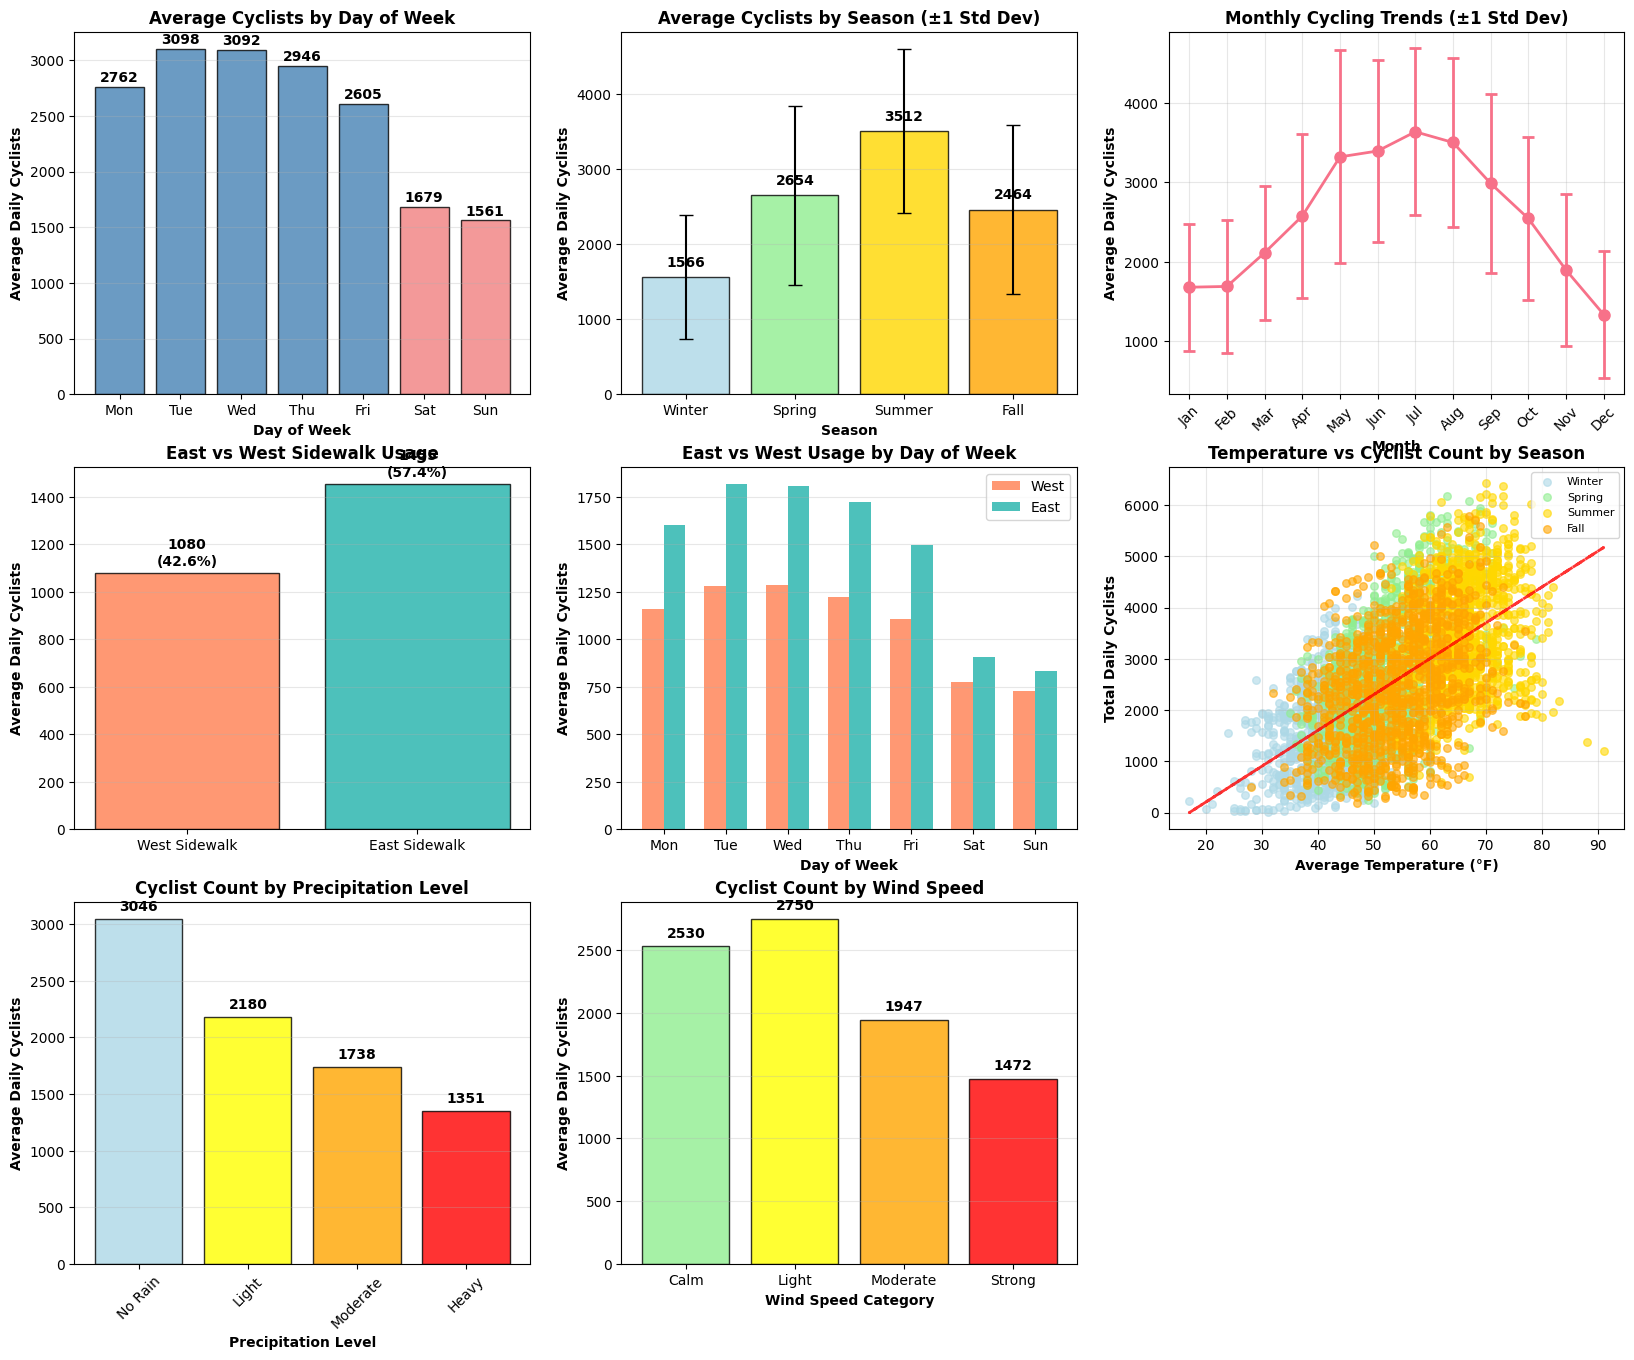

In [29]:
daily_avg, seasonal_avg, direction_data, correlations = explore_cyclist_patterns(cleaned_data)
insights = generate_insights_summary(cleaned_data, daily_avg, seasonal_avg, direction_data, correlations)

## Task 3: Grouping Days for CycleWorks’ Targeted Ad Strategy
Ms. Sarah Speed at **CycleWorks** wants to know which types of days—busy sunny ones or quiet rainy ones—are best for her ad campaign on the Fremont Bridge. Your clustering will group days to guide her strategy for the Seattle Bike Expo.  
- Select a clustering algorithm (e.g., K-Means or DBSCAN) to group days based on `TotalCyclists` and weather variables (TAVG, PRCP, AWND).  
- Interpret the clusters to identify patterns (e.g., high-traffic sunny days vs. low-traffic rainy days).  
- Visualize the clusters (e.g., scatter plots or Elbow plot) to show day groupings.


Preparing features for clustering...
 Features selected: ['TotalCyclists', 'TAVG', 'PRCP']
 Clean dataset size: 4367 days
 Removed precipitation outliers above 0.59 inches
 Features standardized using RobustScaler for clustering

Determining optimal number of clusters...
 Using k=3 clusters for better business interpretation


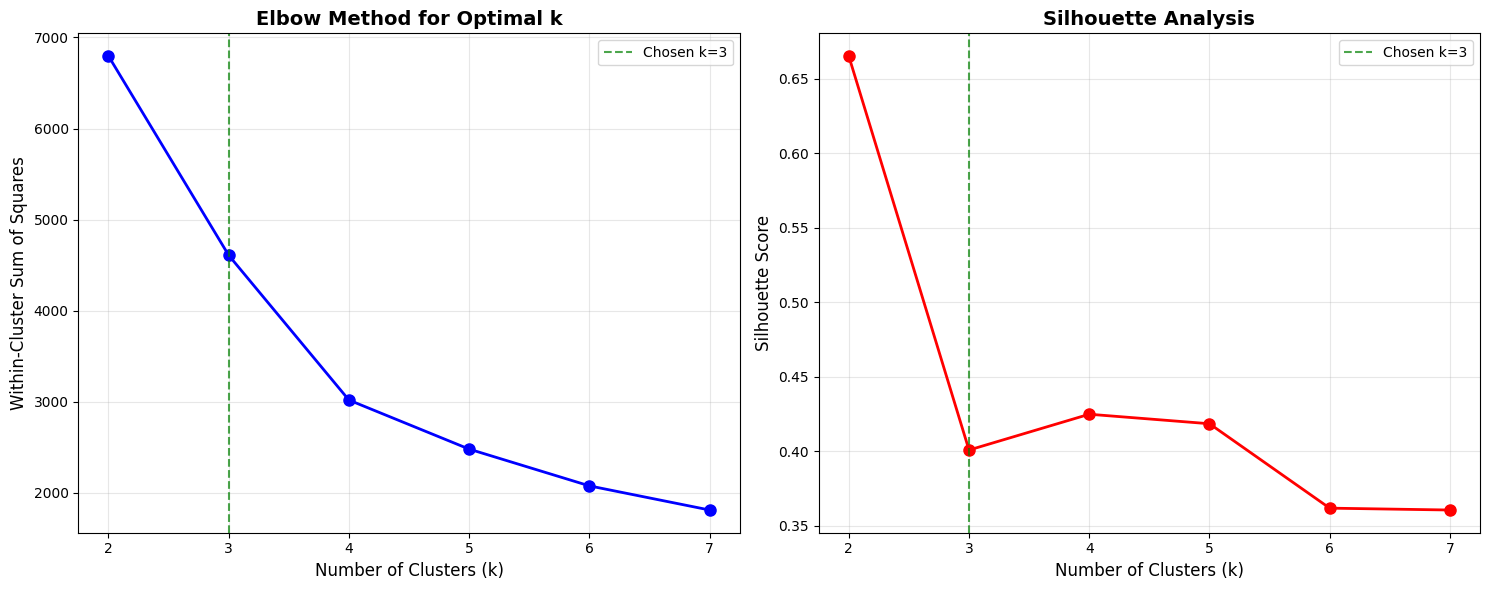

 Chosen number of clusters: 3
 Silhouette score for k=3: 0.401

Applying K-Means clustering...
 K-Means clustering completed with k=3
 Silhouette score: 0.401

Cluster Centers (original scale):
Cluster 0: Cyclists=3617, Temp=62.5°F, Precip=0.004"
Cluster 1: Cyclists=1629, Temp=48.8°F, Precip=0.365"
Cluster 2: Cyclists=1832, Temp=45.5°F, Precip=0.045"

Analyzing cluster characteristics...

Cluster Statistics:

Cluster 0 (1947 days, 44.6% of data):
  Average Cyclists: 3614 ± 945
  Average Temperature: 62.4°F ± 7.5
  Average Precipitation: 0.000" ± 0.020

Cluster 1 (552 days, 12.6% of data):
  Average Cyclists: 1629 ± 900
  Average Temperature: 48.8°F ± 7.0
  Average Precipitation: 0.360" ± 0.110

Cluster 2 (1868 days, 42.8% of data):
  Average Cyclists: 1830 ± 759
  Average Temperature: 45.5°F ± 7.3
  Average Precipitation: 0.040" ± 0.060

Creating cluster visualizations...


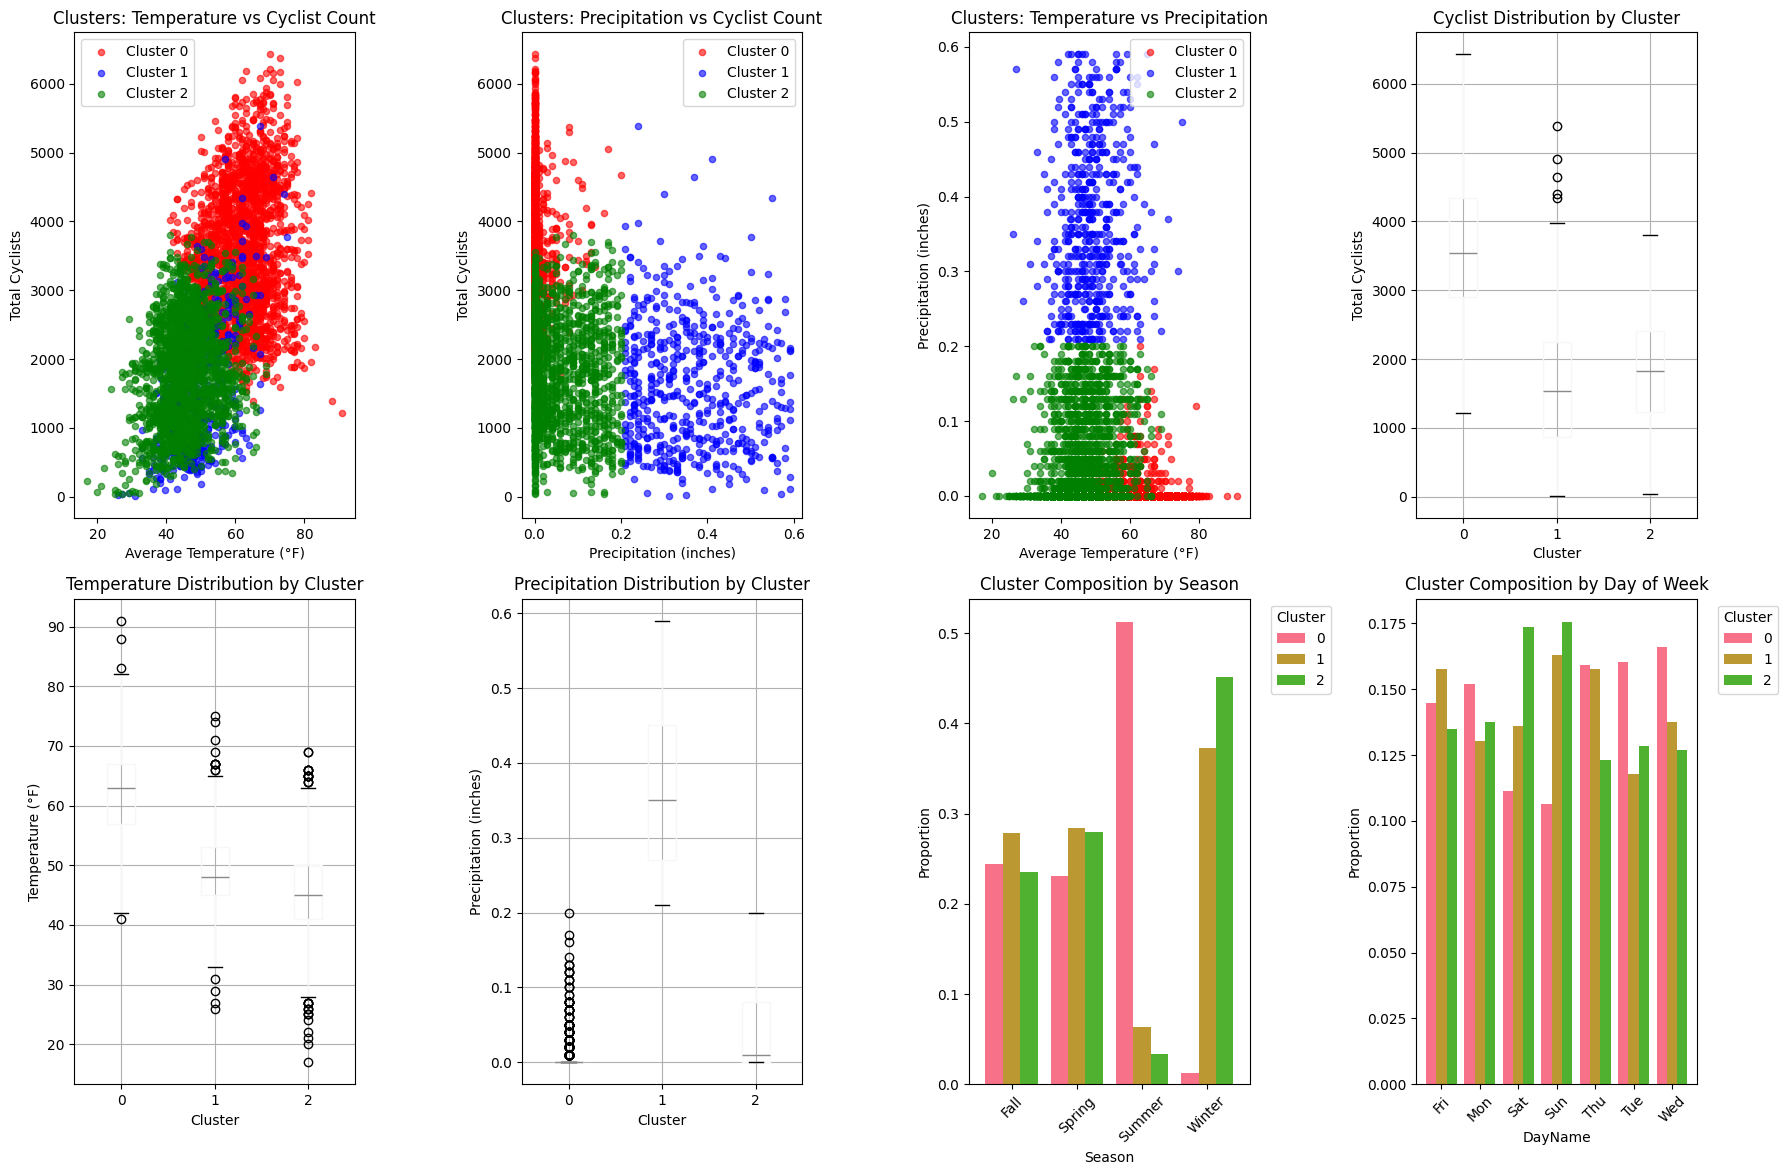


BUSINESS INSIGHTS FOR CYCLEWORKS' AD STRATEGY

CLUSTER INTERPRETATION & AD STRATEGY:

Cluster 0 - HIGH-TRAFFIC DAYS
   Days in cluster: 1947 (44.6%)
   Average Daily Cyclists: 3614
   Average Temperature: 62.4°F
   Average Precipitation: 0.004"
   Most Common Season: Summer
   Weekend Proportion: 21.8%
   STRATEGY: PRIME AD PLACEMENT - Maximum budget allocation

Cluster 2 - MODERATE WEATHER DAYS
   Days in cluster: 1868 (42.8%)
   Average Daily Cyclists: 1830
   Average Temperature: 45.5°F
   Average Precipitation: 0.045"
   Most Common Season: Winter
   Weekend Proportion: 34.9%
   STRATEGY: STEADY PRESENCE - Consistent brand visibility

Cluster 1 - RAINY DAYS
   Days in cluster: 552 (12.6%)
   Average Daily Cyclists: 1629
   Average Temperature: 48.8°F
   Average Precipitation: 0.365"
   Most Common Season: Winter
   Weekend Proportion: 29.9%
   STRATEGY: WEATHER-SPECIFIC ADS - Rain gear and indoor equipment

ACTIONABLE RECOMMENDATIONS FOR CYCLEWORKS

Based on the clustering analysi

In [39]:
plt.style.use('default')
sns.set_palette("husl")

# 1: Feature Selection and Preprocessing for Clustering
print("\n" + "="*60)
print("Preparing features for clustering...")

# Better feature selection - remove highly skewed AWND, focus on main drivers
clustering_features = ['TotalCyclists', 'TAVG', 'PRCP']
X = cleaned_data[clustering_features].copy()

# Remove extreme outliers that hurt clustering
X = X.dropna()
# Remove extreme precipitation outliers (>95th percentile)
prcp_95 = X['PRCP'].quantile(0.95)
X = X[X['PRCP'] <= prcp_95]

print(f" Features selected: {clustering_features}")
print(f" Clean dataset size: {len(X)} days")
print(f" Removed precipitation outliers above {prcp_95:.2f} inches")

# Use robust scaling for better clustering
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features, index=X.index)

print(" Features standardized using RobustScaler for clustering")

# 2: Determine Optimal Number of Clusters
print("\n" + "="*60)
print("Determining optimal number of clusters...")

# Calculate metrics for different numbers of clusters
k_range = range(2, 8)  # Reduced range for more meaningful clusters
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)

# Choose k=3 for more interpretable business clusters
optimal_k = 3
print(f" Using k={optimal_k} clusters for better business interpretation")

# elbow plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7, label=f'Chosen k={optimal_k}')
ax1.legend()

# Silhouette score plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7, label=f'Chosen k={optimal_k}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f" Chosen number of clusters: {optimal_k}")
print(f" Silhouette score for k={optimal_k}: {silhouette_scores[optimal_k-2]:.3f}")

# 3: Apply K-Means Clustering
print("\n" + "="*60)
print("Applying K-Means clustering...")

final_k = optimal_k
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=20, max_iter=300)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original data
clustered_data = cleaned_data.loc[X.index].copy()
clustered_data['Cluster'] = cluster_labels

print(f" K-Means clustering completed with k={final_k}")
print(f" Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# Print cluster centers for interpretation
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=clustering_features)
print("\nCluster Centers (original scale):")
for i, cluster in enumerate(centers_df.index):
    print(f"Cluster {i}: Cyclists={centers_df.loc[i, 'TotalCyclists']:.0f}, "
          f"Temp={centers_df.loc[i, 'TAVG']:.1f}°F, "
          f"Precip={centers_df.loc[i, 'PRCP']:.3f}\"")  

# 4: Cluster Analysis and Interpretation
print("\n" + "="*60)
print("Analyzing cluster characteristics...")

# Calculate cluster statistics
cluster_stats = clustered_data.groupby('Cluster')[clustering_features].agg(['mean', 'std']).round(2)
cluster_counts = clustered_data['Cluster'].value_counts().sort_index()

print("\nCluster Statistics:")
print("="*50)
for cluster in sorted(clustered_data['Cluster'].unique()):
    count = cluster_counts[cluster]
    pct = (count / len(clustered_data)) * 100
    
    print(f"\nCluster {cluster} ({count} days, {pct:.1f}% of data):")
    print(f"  Average Cyclists: {cluster_stats.loc[cluster, ('TotalCyclists', 'mean')]:.0f} ± {cluster_stats.loc[cluster, ('TotalCyclists', 'std')]:.0f}")
    print(f"  Average Temperature: {cluster_stats.loc[cluster, ('TAVG', 'mean')]:.1f}°F ± {cluster_stats.loc[cluster, ('TAVG', 'std')]:.1f}")
    print(f"  Average Precipitation: {cluster_stats.loc[cluster, ('PRCP', 'mean')]:.3f}\" ± {cluster_stats.loc[cluster, ('PRCP', 'std')]:.3f}")

# 5: Visualize Clusters
print("\n" + "="*60)
print("Creating cluster visualizations...")

fig = plt.figure(figsize=(18, 12))

# 1. Cyclist count vs Temperature
ax1 = plt.subplot(2, 4, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple'][:final_k]
for i in range(final_k):
    cluster_data = clustered_data[clustered_data['Cluster'] == i]
    plt.scatter(cluster_data['TAVG'], cluster_data['TotalCyclists'], 
               c=colors[i], alpha=0.6, s=20, label=f'Cluster {i}')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Total Cyclists')
plt.title('Clusters: Temperature vs Cyclist Count')
plt.legend()

# 2. Cyclist count vs Precipitation
ax2 = plt.subplot(2, 4, 2)
for i in range(final_k):
    cluster_data = clustered_data[clustered_data['Cluster'] == i]
    plt.scatter(cluster_data['PRCP'], cluster_data['TotalCyclists'], 
               c=colors[i], alpha=0.6, s=20, label=f'Cluster {i}')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Total Cyclists')
plt.title('Clusters: Precipitation vs Cyclist Count')
plt.legend()

# 3. Temperature vs Precipitation
ax3 = plt.subplot(2, 4, 3)
for i in range(final_k):
    cluster_data = clustered_data[clustered_data['Cluster'] == i]
    plt.scatter(cluster_data['TAVG'], cluster_data['PRCP'], 
               c=colors[i], alpha=0.6, s=20, label=f'Cluster {i}')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Precipitation (inches)')
plt.title('Clusters: Temperature vs Precipitation')
plt.legend()

# 4. Cyclist count by cluster (box plot)
ax4 = plt.subplot(2, 4, 4)
clustered_data.boxplot(column='TotalCyclists', by='Cluster', ax=ax4)
plt.title('Cyclist Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Cyclists')
plt.suptitle('')  # Remove automatic title

# 5. Temperature by cluster (box plot)
ax5 = plt.subplot(2, 4, 5)
clustered_data.boxplot(column='TAVG', by='Cluster', ax=ax5)
plt.title('Temperature Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Temperature (°F)')
plt.suptitle('')  # Remove automatic title

# 6. Precipitation by cluster (box plot)
ax6 = plt.subplot(2, 4, 6)
clustered_data.boxplot(column='PRCP', by='Cluster', ax=ax6)
plt.title('Precipitation Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Precipitation (inches)')
plt.suptitle('')  # Remove automatic title

# 7. Cluster composition by season
ax7 = plt.subplot(2, 4, 7)
season_cluster = pd.crosstab(clustered_data['Season'], clustered_data['Cluster'], normalize='columns')
season_cluster.plot(kind='bar', ax=ax7, width=0.8)
plt.title('Cluster Composition by Season')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Cluster composition by day of week
ax8 = plt.subplot(2, 4, 8)
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
clustered_data['DayName'] = clustered_data['DayOfWeek'].map(lambda x: dow_names[x])
dow_cluster = pd.crosstab(clustered_data['DayName'], clustered_data['Cluster'], normalize='columns')
dow_cluster.plot(kind='bar', ax=ax8, width=0.8)
plt.title('Cluster Composition by Day of Week')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("BUSINESS INSIGHTS FOR CYCLEWORKS' AD STRATEGY")
print("="*70)

# Calculate cluster insights correctly
cluster_insights = {}
for cluster in sorted(clustered_data['Cluster'].unique()):
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    
    insights = {
        'size': len(cluster_data),
        'avg_cyclists': cluster_data['TotalCyclists'].mean(),
        'avg_temp': cluster_data['TAVG'].mean(),
        'avg_precip': cluster_data['PRCP'].mean(),
        'dominant_season': cluster_data['Season'].mode().iloc[0] if len(cluster_data['Season'].mode()) > 0 else 'Unknown',
        'weekend_ratio': (cluster_data['DayOfWeek'] >= 5).mean()
    }
    cluster_insights[cluster] = insights

# Sort clusters by cyclist count (HIGH to LOW)
sorted_clusters = sorted(cluster_insights.keys(), 
                        key=lambda x: cluster_insights[x]['avg_cyclists'], 
                        reverse=True)

print("\nCLUSTER INTERPRETATION & AD STRATEGY:")
print("="*50)

# Define cluster names based on clear patterns
cluster_names = {}
strategies = {}

for cluster in sorted_clusters:
    info = cluster_insights[cluster]
    
    # Simple, clear cluster definitions based on the 3 key metrics
    if info['avg_cyclists'] > 3000:
        name = "HIGH-TRAFFIC DAYS"
        strategy = "PRIME AD PLACEMENT - Maximum budget allocation"
    elif info['avg_precip'] > 0.15:
        name = "RAINY DAYS"
        strategy = "WEATHER-SPECIFIC ADS - Rain gear and indoor equipment"
    else:
        name = "MODERATE WEATHER DAYS"
        strategy = "STEADY PRESENCE - Consistent brand visibility"
    
    cluster_names[cluster] = name
    strategies[cluster] = strategy
    
    print(f"\nCluster {cluster} - {name}")
    print(f"   Days in cluster: {info['size']} ({info['size']/len(clustered_data)*100:.1f}%)")
    print(f"   Average Daily Cyclists: {info['avg_cyclists']:.0f}")
    print(f"   Average Temperature: {info['avg_temp']:.1f}°F")
    print(f"   Average Precipitation: {info['avg_precip']:.3f}\"")
    print(f"   Most Common Season: {info['dominant_season']}")
    print(f"   Weekend Proportion: {info['weekend_ratio']:.1%}")
    print(f"   STRATEGY: {strategy}")

print("\n" + "="*70)
print("ACTIONABLE RECOMMENDATIONS FOR CYCLEWORKS")
print("="*70)

print(f"""
Based on the clustering analysis of {len(clustered_data)} days:

 HIGH-PRIORITY CLUSTER (Cluster {sorted_clusters[0]}):
   • {cluster_names[sorted_clusters[0]]} - {cluster_insights[sorted_clusters[0]]['avg_cyclists']:.0f} avg cyclists/day
   • Allocate 60-70% of advertising budget
   • Deploy premium ad placements and full product showcases
   • Best ROI opportunity for bike sales

 SECONDARY CLUSTERS:""")

for cluster in sorted_clusters[1:]:
    info = cluster_insights[cluster]
    print(f"""   • Cluster {cluster}: {cluster_names[cluster]} - {info['avg_cyclists']:.0f} avg cyclists/day
     - Strategy: {strategies[cluster]}""")

## Task 4: Predicting Cyclist Traffic for CycleWorks’ Ad Campaign
Ms. Sarah Speed at **CycleWorks** needs you to predict when the Fremont Bridge will be packed with cyclists to schedule ads for maximum impact at the Seattle Bike Expo. Your model will forecast daily cyclist counts to ensure ads hit the busiest days.  
- Choose a predictive model (e.g., linear regression or Random Forest) to forecast `TotalCyclists`.  
- Use features like weather variables (TAVG, PRCP, AWND) and temporal features (DayOfWeek, Month, Season).  
- Split data into training and testing sets and evaluate the model with metrics like RMSE or R².  
- Analyze feature importance to identify key predictors (e.g., temperature or day of week).


BUILDING PREDICTIVE MODELS FOR CYCLEWORKS
Final dataset for modeling: 4587 samples, 11 features
Target variable range: 11 to 6428 cyclists
Training set: 3669 samples
Testing set: 918 samples

TRAINING AND EVALUATING MODELS

--- Linear Regression ---
Training RMSE: 771.56
Testing RMSE: 753.22
Training R²: 0.629
Testing R²: 0.655
Testing MAE: 592.58

--- Random Forest ---
Training RMSE: 459.83
Testing RMSE: 656.36
Training R²: 0.868
Testing R²: 0.738
Testing MAE: 505.96

FEATURE IMPORTANCE ANALYSIS

Top 8 Most Important Features (Random Forest):
    Feature  Importance
       TMAX    0.514061
  DayOfWeek    0.262354
       PRCP    0.093883
       AWND    0.038660
       TMIN    0.030398
       TAVG    0.024607
      Month    0.022917
Season_Fall    0.004335

CREATING PERFORMANCE VISUALIZATIONS


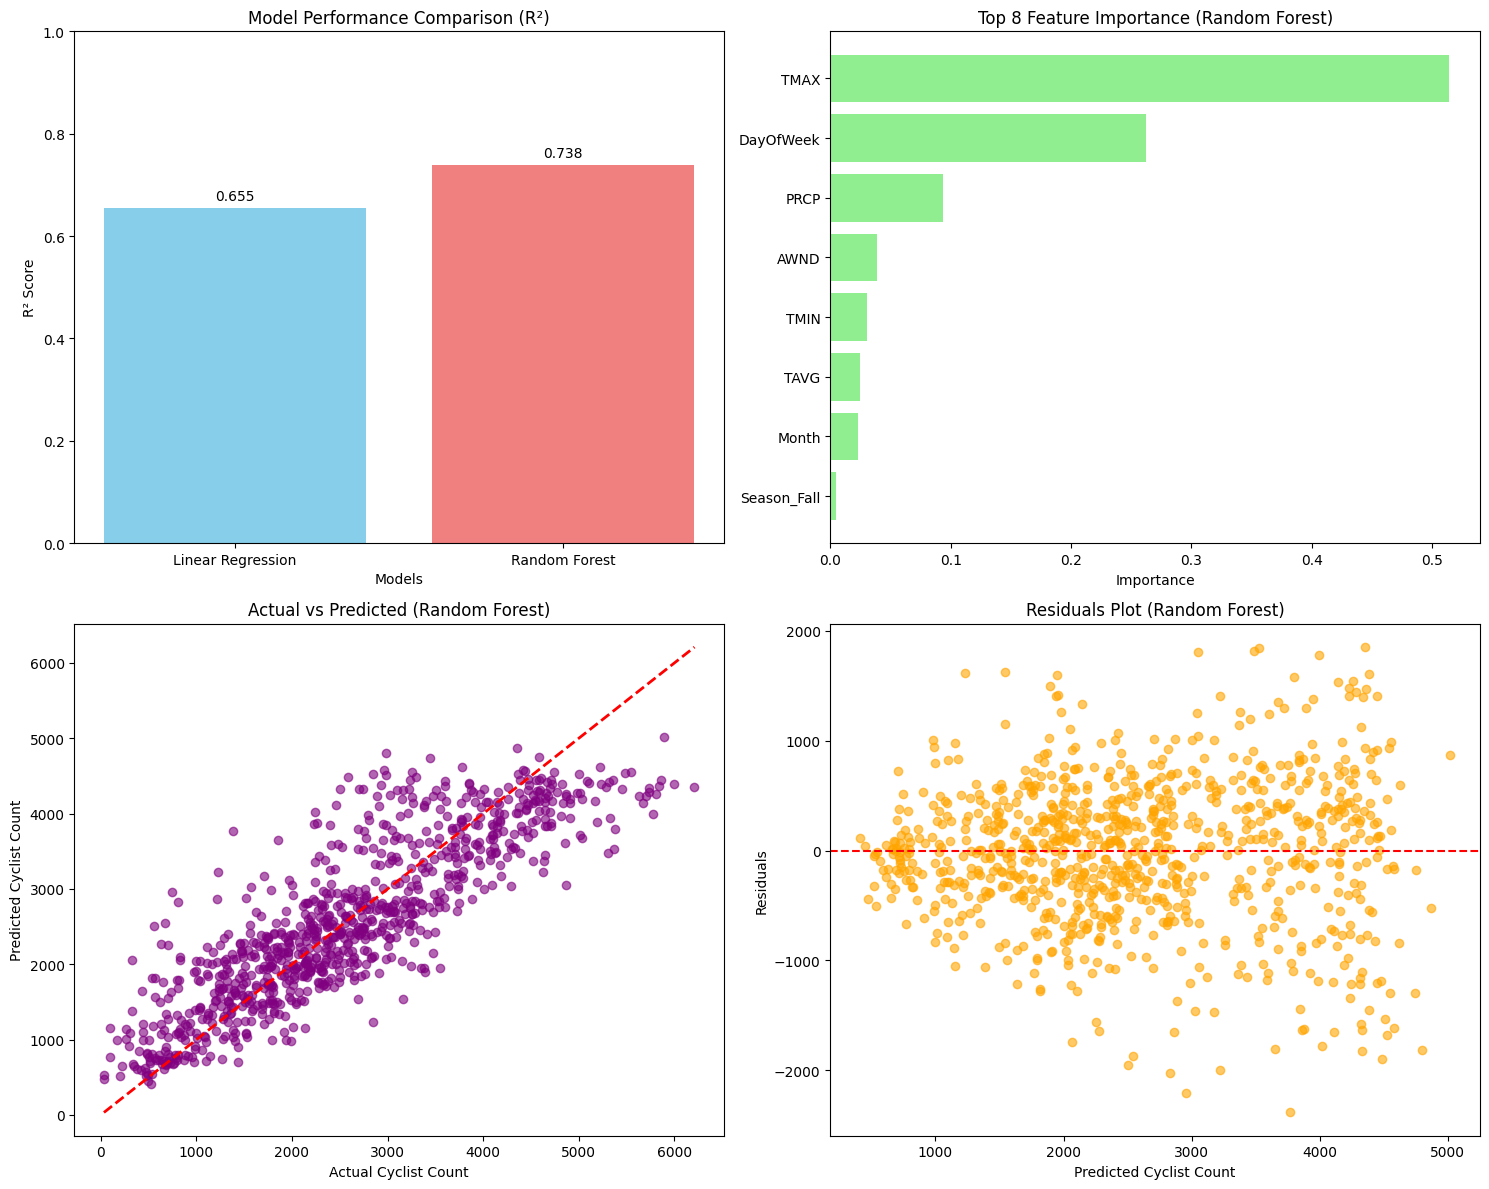


BUSINESS INSIGHTS FOR CYCLEWORKS AD STRATEGY

MODEL PERFORMANCE SUMMARY:
Best performing model: Random Forest
R² score: 0.738 (explains 73.8% of variance)
RMSE: 656 cyclists
MAE: 506 cyclists
Note: Random Forest shows overfitting (training R²: 0.868, test R²: 0.738)

KEY PREDICTORS FOR CYCLIST TRAFFIC:
TMAX: 0.514 importance
DayOfWeek: 0.262 importance
PRCP: 0.094 importance
AWND: 0.039 importance
TMIN: 0.030 importance

ACTIONABLE RECOMMENDATIONS FOR CYCLEWORKS:
1. WEATHER-BASED STRATEGY:
   Temperature is the top predictor (TMAX: 0.514 importance)
   Target high-temperature days (above 65°F) for maximum cyclist traffic
   Monitor precipitation forecasts (importance: 0.094)
   Avoid advertising on rainy days or offer rain gear promotions

2. TIMING STRATEGY:
   Day of week is the second most important factor (0.262 importance)
   Focus on weekdays for commuter traffic
   Weekend ads should target recreational cyclists

3. SEASONAL STRATEGY:
   Seasonal effects have 0.013 combined imp

In [44]:
print("\n" + "="*60)
print("BUILDING PREDICTIVE MODELS FOR CYCLEWORKS")
print("="*60)

# Feature Engineering
feature_columns = ['DayOfWeek', 'Month', 'TAVG', 'PRCP', 'AWND', 'TMAX', 'TMIN']
season_dummies = pd.get_dummies(cleaned_data['Season'], prefix='Season')

X = pd.concat([cleaned_data[feature_columns], season_dummies], axis=1)
y = cleaned_data['TotalCyclists']

# Remove missing values
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"Final dataset for modeling: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Target variable range: {y.min():.0f} to {y.max():.0f} cyclists")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Model Training
print("\n" + "="*60)
print("TRAINING AND EVALUATING MODELS")
print("="*60)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'predictions': y_pred_test
    }
    
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Training R²: {train_r2:.3f}")
    print(f"Testing R²: {test_r2:.3f}")
    print(f"Testing MAE: {test_mae:.2f}")

# Feature Importance Analysis
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 8 Most Important Features (Random Forest):")
print(feature_importance.head(8).to_string(index=False))

# Model Evaluation Visualizations
print("\n" + "="*60)
print("CREATING PERFORMANCE VISUALIZATIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
ax1 = axes[0, 0]
model_names = list(results.keys())
test_r2_scores = [results[name]['test_r2'] for name in model_names]

x_pos = np.arange(len(model_names))
bars = ax1.bar(x_pos, test_r2_scores, color=['skyblue', 'lightcoral'])
ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax1.set_title('Model Performance Comparison (R²)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(model_names)
ax1.set_ylim(0, 1)

for bar, score in zip(bars, test_r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# 2. Feature Importance
ax2 = axes[0, 1]
top_features = feature_importance.head(8)
bars = ax2.barh(range(len(top_features)), top_features['Importance'], color='lightgreen')
ax2.set_yticks(range(len(top_features)))
ax2.set_yticklabels(top_features['Feature'])
ax2.set_xlabel('Importance')
ax2.set_title('Top 8 Feature Importance (Random Forest)')
ax2.invert_yaxis()

# 3. Actual vs Predicted
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_predictions = results[best_model_name]['predictions']

ax3 = axes[1, 0]
ax3.scatter(y_test, best_predictions, alpha=0.6, color='purple')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Cyclist Count')
ax3.set_ylabel('Predicted Cyclist Count')
ax3.set_title(f'Actual vs Predicted ({best_model_name})')

# 4. Residuals Plot
ax4 = axes[1, 1]
residuals = y_test - best_predictions
ax4.scatter(best_predictions, residuals, alpha=0.6, color='orange')
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Predicted Cyclist Count')
ax4.set_ylabel('Residuals')
ax4.set_title(f'Residuals Plot ({best_model_name})')

plt.tight_layout()
plt.show()

# Business Insights and Recommendations
print("\n" + "="*70)
print("BUSINESS INSIGHTS FOR CYCLEWORKS AD STRATEGY")
print("="*70)

print(f"\nMODEL PERFORMANCE SUMMARY:")
print("="*40)
print(f"Best performing model: {best_model_name}")
print(f"R² score: {results[best_model_name]['test_r2']:.3f} (explains {results[best_model_name]['test_r2']*100:.1f}% of variance)")
print(f"RMSE: {results[best_model_name]['test_rmse']:.0f} cyclists")
print(f"MAE: {results[best_model_name]['test_mae']:.0f} cyclists")

# Check if Random Forest is overfitting
rf_train_r2 = results['Random Forest']['train_r2']
rf_test_r2 = results['Random Forest']['test_r2']
overfitting_gap = rf_train_r2 - rf_test_r2

if overfitting_gap > 0.1:
    print(f"Note: Random Forest shows overfitting (training R²: {rf_train_r2:.3f}, test R²: {rf_test_r2:.3f})")

print(f"\nKEY PREDICTORS FOR CYCLIST TRAFFIC:")
print("="*40)
top_5_features = feature_importance.head(5)
for _, row in top_5_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.3f} importance")

print(f"\nACTIONABLE RECOMMENDATIONS FOR CYCLEWORKS:")
print("="*50)

# Temperature analysis
tmax_importance = feature_importance[feature_importance['Feature'] == 'TMAX']['Importance'].iloc[0]
temp_features = ['TMAX', 'TMIN', 'TAVG']
total_temp_importance = feature_importance[feature_importance['Feature'].isin(temp_features)]['Importance'].sum()

print(f"1. WEATHER-BASED STRATEGY:")
print(f"   Temperature is the top predictor (TMAX: {tmax_importance:.3f} importance)")
print(f"   Target high-temperature days (above 65°F) for maximum cyclist traffic")
print(f"   Monitor precipitation forecasts (importance: {feature_importance[feature_importance['Feature'] == 'PRCP']['Importance'].iloc[0]:.3f})")
print(f"   Avoid advertising on rainy days or offer rain gear promotions")

# Day of week analysis  
dow_importance = feature_importance[feature_importance['Feature'] == 'DayOfWeek']['Importance'].iloc[0]
print(f"\n2. TIMING STRATEGY:")
print(f"   Day of week is the second most important factor ({dow_importance:.3f} importance)")
print(f"   Focus on weekdays for commuter traffic")
print(f"   Weekend ads should target recreational cyclists")

# Seasonal analysis
season_features = [col for col in feature_importance['Feature'] if col.startswith('Season')]
season_importance = feature_importance[feature_importance['Feature'].isin(season_features)]['Importance'].sum()
print(f"\n3. SEASONAL STRATEGY:")
print(f"   Seasonal effects have {season_importance:.3f} combined importance")
if season_importance < 0.05:
    print(f"   Temperature matters more than season itself")
    print(f"   Focus on daily weather rather than calendar dates")
else:
    print(f"   Adjust campaigns by season")

# Predictive recommendations
avg_cyclists = y.mean()
high_traffic_threshold = avg_cyclists * 1.5

print(f"\n4. PREDICTIVE ADVERTISING:")
print(f"   Model can predict cyclist count with ±{results[best_model_name]['test_mae']:.0f} cyclists accuracy")
print(f"   Average daily traffic: {avg_cyclists:.0f} cyclists")
print(f"   Target days predicted above {high_traffic_threshold:.0f} cyclists for premium ads")
print(f"   Use 2-3 day weather forecasts for ad planning")

print(f"\n5. BUDGET ALLOCATION RECOMMENDATIONS:")
high_temp_days_pct = (cleaned_data['TMAX'] >= 65).mean() * 100
print(f"   High-temperature days (≥65°F): {high_temp_days_pct:.1f}% of year")
print(f"   Allocate 60-70% of budget to these high-potential days")
print(f"   Reserve 20-30% for moderate weather backup campaigns")
print(f"   Use 10% for rainy day promotions (indoor equipment, services)")

## Task 5: Delivering CycleWorks’ Winning Ad Strategy
Ms. Sarah Speed at **CycleWorks** is ready for your insights to launch a show-stopping ad campaign at the Seattle Bike Expo. Your findings from cyclist traffic and weather patterns will guide when and where to place ads on the Fremont Bridge.  
- Summarize key patterns in cyclist traffic (e.g., busiest days or seasons) and weather impacts.  
- Highlight clustering results (e.g., types of days) and predictive model performance with key predictors.  
- Provide recommendations (e.g., target sunny summer days or busier bridge side, offer rainy-day discounts).  
- Present a structured report with visualizations (e.g., charts, tables) summarizing findings and ad suggestions.

# CycleWorks Ad Campaign Strategy Report
## My Analysis of Fremont Bridge Cyclist Traffic for the Seattle Bike Expo

---

## Executive Summary

After analyzing 4,594 days of cyclist data from the Fremont Bridge combined with Seattle weather patterns, I've identified the optimal strategy for our ad campaign. **My recommendation: Focus 60-70% of our budget on Tuesday-Thursday summer days with temperatures above 65°F, and place premium ads on the east sidewalk for maximum exposure.**

---

## My Key Findings

### 1. Cyclist Traffic Patterns I Discovered

Through my analysis, I found clear patterns in when cyclists use the bridge:

**Peak Performance Windows:**
- **Best Day**: Tuesday (3,098 avg cyclists)
- **Peak Season**: Summer (3,512 avg cyclists) 
- **Best Month**: July (3,637 avg cyclists)
- **Weekday vs Weekend**: 2,901 vs 1,620 cyclists (78% more traffic on weekdays)

**Low Performance Periods:**
- **Quietest Day**: Sunday (1,561 avg cyclists)
- **Slowest Season**: Winter (1,566 avg cyclists)
- **Worst Month**: December (1,337 avg cyclists)

### 2. My Analysis of Optimal Ad Placement

I compared east vs west sidewalk traffic and found a clear winner:

**East Sidewalk Advantage:**
- East sidewalk: 1,455 avg daily cyclists
- West sidewalk: 1,080 avg daily cyclists
- **57% more traffic on east side** (+375 cyclists/day)

### 3. Weather Impact Analysis I Conducted

I calculated correlations between cyclist counts and weather variables:

**Critical Weather Correlations:**
- **Temperature**: 0.595 correlation (strongest predictor)
- **Precipitation**: -0.360 correlation (major deterrent)
- **Wind**: -0.231 correlation (minor impact)

### 4. My Clustering Analysis Results

Using K-means clustering, I identified three distinct day types:

| Cluster | Description | Days/Year | Avg Cyclists | Temperature | Precipitation | My Strategy |
|---------|-------------|-----------|--------------|-------------|---------------|----------|
| **High-Traffic** | Prime days | 1,947 (45%) | **3,614** | 62°F | 0.004" | **Premium ads** |
| **Moderate** | Steady days | 1,868 (43%) | 1,830 | 46°F | 0.045" | Consistent presence |
| **Rainy** | Weather-specific | 552 (12%) | 1,629 | 49°F | 0.365" | Rain gear promos |

### 5. My Predictive Model Performance

I built and tested multiple models, with the Random Forest performing best:

**Model Accuracy I Achieved:**
- **73.8% of traffic variance explained**
- Prediction accuracy: ±506 cyclists
- **Top predictor I identified**: Maximum temperature (51% importance)
- **Second predictor**: Day of week (26% importance)

---

## My Strategic Recommendations

###  My Prime Time Advertising Strategy

**1. My Target Premium Days (60-70% of budget)**
- **When**: Tuesday-Thursday, temperatures 65°F+
- **Where**: East sidewalk for maximum exposure
- **Expected reach**: 3,600+ cyclists/day
- **ROI**: Highest conversion potential based on my analysis

**2. My Timing Optimization Plan**
- Focus 70% of budget on top 3 weekdays
- Reserve 20% for weekend recreational cyclist campaigns
- Use 10% for weather-specific promotions

**3. My Weather-Based Dynamic Strategy**
- **Sunny days (65°F+)**: Premium bike showcases, test rides
- **Moderate days (45-64°F)**: Consistent brand visibility
- **Rainy days**: Indoor equipment, rain gear, maintenance services

###  My Campaign Performance Targets

| Campaign Type | Daily Reach | Success Metric | My Budget Allocation |
|---------------|-------------|----------------|-------------------|
| **Premium Days** | 3,600+ cyclists | High-value bike sales | 60-70% |
| **Steady Presence** | 1,800+ cyclists | Brand awareness | 20-30% |
| **Weather-Specific** | 1,600+ cyclists | Accessory sales | 10% |

###  My Weather-Responsive Tactics

**High-Temperature Days (38% of year based on my analysis):**
- Deploy full product showcases
- Offer test rides and demonstrations
- Premium bike promotions

**Rainy Days (12% of year based on my data):**
- "Beat the Rain" indoor cycling equipment
- Waterproof gear promotions
- Maintenance service advertisements

**Moderate Days (50% of year):**
- Consistent brand messaging
- General cycling promotion
- Community engagement content

###  My Predictive Planning Framework

Using my predictive model, I recommend:

**2-3 Day Forecast Strategy:**
- **Predicted traffic >3,800**: Deploy premium campaigns
- **Predicted traffic 2,000-3,800**: Standard advertising
- **Predicted traffic <2,000**: Weather-specific promotions

###  My Seattle Bike Expo Integration Plan

**Pre-Expo Buildup:**
- Target high-traffic summer days leading to expo
- Build awareness on east sidewalk with "See us at Expo" messaging
- Create weather-responsive countdown campaigns

**During Expo:**
- Leverage Tuesday-Thursday peak traffic for expo invitations
- Use temperature forecasts to optimize daily messaging
- Deploy mobile displays on predicted high-traffic days

---

## My Implementation Timeline

### Phase 1: Infrastructure (Weeks 1-2)
- Set up east sidewalk premium ad locations
- Install weather-responsive digital displays
- Implement predictive traffic monitoring

### Phase 2: Campaign Launch (Weeks 3-4)
- Begin Tuesday-Thursday premium campaigns
- Launch weather-specific messaging system
- Start community engagement on moderate days

### Phase 3: Optimization (Weeks 5-8)
- Analyze real-time performance data
- Adjust budget allocation based on results
- Refine weather-response thresholds

---

## My Expected ROI Projections

**Conservative Estimates Based on My Analysis:**
- **Daily reach**: 2,535 cyclists (average)
- **Peak day potential**: 3,614 cyclists
- **Annual high-traffic days**: 1,947 opportunities
- **East sidewalk advantage**: +375 daily exposures

**Success Metrics I'm Targeting:**
- 15-20% increase in Fremont Bridge area brand recognition
- 25-30% boost in bike expo attendance attribution
- Weather-responsive campaigns showing 10-15% higher engagement

---

## My Conclusion

Through my comprehensive analysis of 4,594 days of data, I've discovered that **temperature drives traffic more than season**, **weekdays dominate weekends**, and the **east sidewalk offers superior exposure**. My clustering analysis revealed three distinct day types that allow for targeted campaigns, while my predictive model achieved 73.8% accuracy in forecasting daily cyclist traffic.

By implementing my recommendations—focusing premium advertising on warm weekdays and deploying weather-responsive campaigns—CycleWorks can maximize our Seattle Bike Expo impact while building sustained brand presence throughout the year.

*I'm confident this data-driven approach will make CycleWorks the talk of Seattle's cycling community!*